In [1]:
from __future__ import print_function

import math

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as snf

%matplotlib inline

from realization import realization
from realization import pixel_sample as pixs

In [2]:
nx = 1024
nw = 32
winfunc_x = np.zeros(nx, dtype=float)
winfunc_x[:nw] = 1
winfunc_x /= winfunc_x.sum()

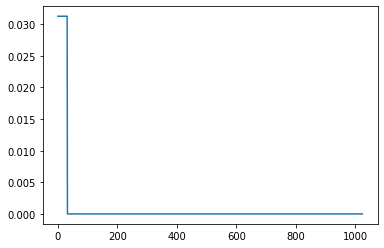

In [3]:
plt.plot(winfunc_x)

In [4]:
winfunc_k = np.fft.rfftn(winfunc_x)
kvals = realization.get_k(winfunc_x.shape)
abskvals = np.sqrt(realization.get_k2(winfunc_x.shape))

#### note that we NEED to divide out by the single-pixel pixwin!
winfunc_k_th = pixs.pixelWindow1D(abskvals,nw)/pixs.pixelWindow1D(abskvals,1)

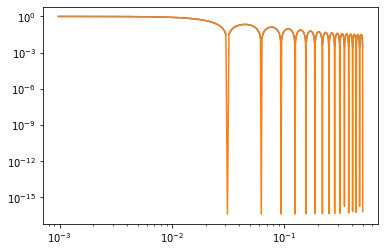

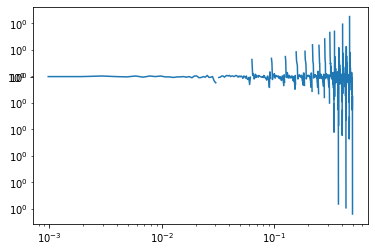

In [5]:
pltr = plt.loglog
pltr(abskvals, np.abs(winfunc_k), nonpositive='mask')
pltr(abskvals, np.abs(winfunc_k_th), nonpositive='mask')
plt.figure()
pltr(abskvals, np.abs(winfunc_k)/np.abs(winfunc_k_th), nonpositive='mask')



In [6]:
npix1d=256
a = np.random.randn(npix1d, npix1d)
f = np.zeros_like(a)
b = snf.uniform_filter(a, size=16, output=f)

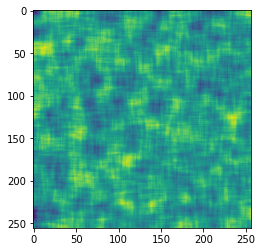

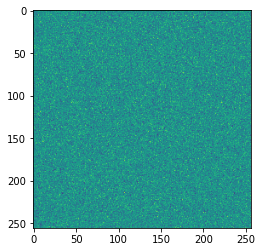

In [7]:
plt.figure(); plt.imshow(f)
plt.figure(); plt.imshow(a)


In [8]:
print(b)

[[-0.29629262 -0.29528649 -0.32797553 ...  0.17258654  0.16083192
   0.14443754]
 [-0.21944826 -0.21273753 -0.25997376 ...  0.18328992  0.17495023
   0.17348729]
 [-0.22906215 -0.22286803 -0.26904475 ...  0.15284758  0.13739665
   0.13565867]
 ...
 [ 0.01751508 -0.03677205 -0.11647135 ... -0.01338775  0.00817466
   0.03704271]
 [-0.00622225 -0.07486834 -0.15775513 ... -0.07684928 -0.06198375
  -0.03398829]
 [ 0.03267035 -0.02845283 -0.12622295 ... -0.08734832 -0.06146287
  -0.01899014]]
